## Problem Statement:
Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

#Historical data of demand for a product-center combination (Weeks: 1 to 145)
* Product(Meal) features such as category, sub-category, current price and discount
* Information for fulfillment center like center area, city information etc.
 

In [1]:
#Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
train=pd.read_csv('train.csv')
centre=pd.read_csv('fulfilment_center_info.csv')
meal=pd.read_csv('meal_info.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270


In [5]:
centre.head(2)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7


In [6]:
meal.head(2)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai


In [7]:
test.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0


In [8]:
#Shape:
train.shape, test.shape, centre.shape, meal.shape

((456548, 9), (32573, 8), (77, 5), (51, 3))

In [9]:
#Join train & test:
combined=pd.concat([train,test],ignore_index=True)

In [10]:
#Merge centre:
combined=pd.merge(combined,centre,on='center_id',how='left')
combined=pd.merge(combined,meal,on='meal_id',how='left')

In [11]:
combined.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai


In [12]:
#Online Activity:
combined['Online_Activity']=combined.emailer_for_promotion+combined.homepage_featured

In [13]:
#Lets create a new feature discount:
combined['Discount']=np.abs(combined.base_price - combined.checkout_price)

In [14]:
combined.Discount.describe()

count    489121.000000
mean         22.374939
std          47.544701
min           0.000000
25%           1.000000
50%           1.000000
75%          14.550000
max         820.590000
Name: Discount, dtype: float64

In [15]:
combined.loc[:,['Discount','num_orders','base_price','checkout_price']].corr()

,Discount,num_orders,base_price,checkout_price
Discount,1.000000,0.153774,0.299764,0.002163
num_orders,0.153774,1.000000,-0.222306,-0.282108
base_price,0.299764,-0.222306,1.000000,0.954192
checkout_price,0.002163,-0.282108,0.954192,1.000000


In [16]:
combined.loc[:,['Discount','num_orders','base_price','checkout_price']].describe()

,Discount,num_orders,base_price,checkout_price
count,489121.000000,456548.000000,489121.000000,489121.000000
mean,22.374939,261.872760,354.312259,332.879277
std,47.544701,395.922798,160.352168,153.022073
min,0.000000,13.000000,55.350000,2.970000
25%,1.000000,54.000000,243.500000,228.010000
50%,1.000000,136.000000,311.430000,299.760000
75%,14.550000,324.000000,458.810000,445.230000
max,820.590000,24299.000000,1112.620000,1113.620000


In [17]:
combined.select_dtypes(include='object').columns

Index(['center_type', 'category', 'cuisine'], dtype='object')

In [18]:
len(combined.center_id.unique())

77

In [19]:
cat_vars=['center_type','category','cuisine','city_code','region_code','Online_Activity']

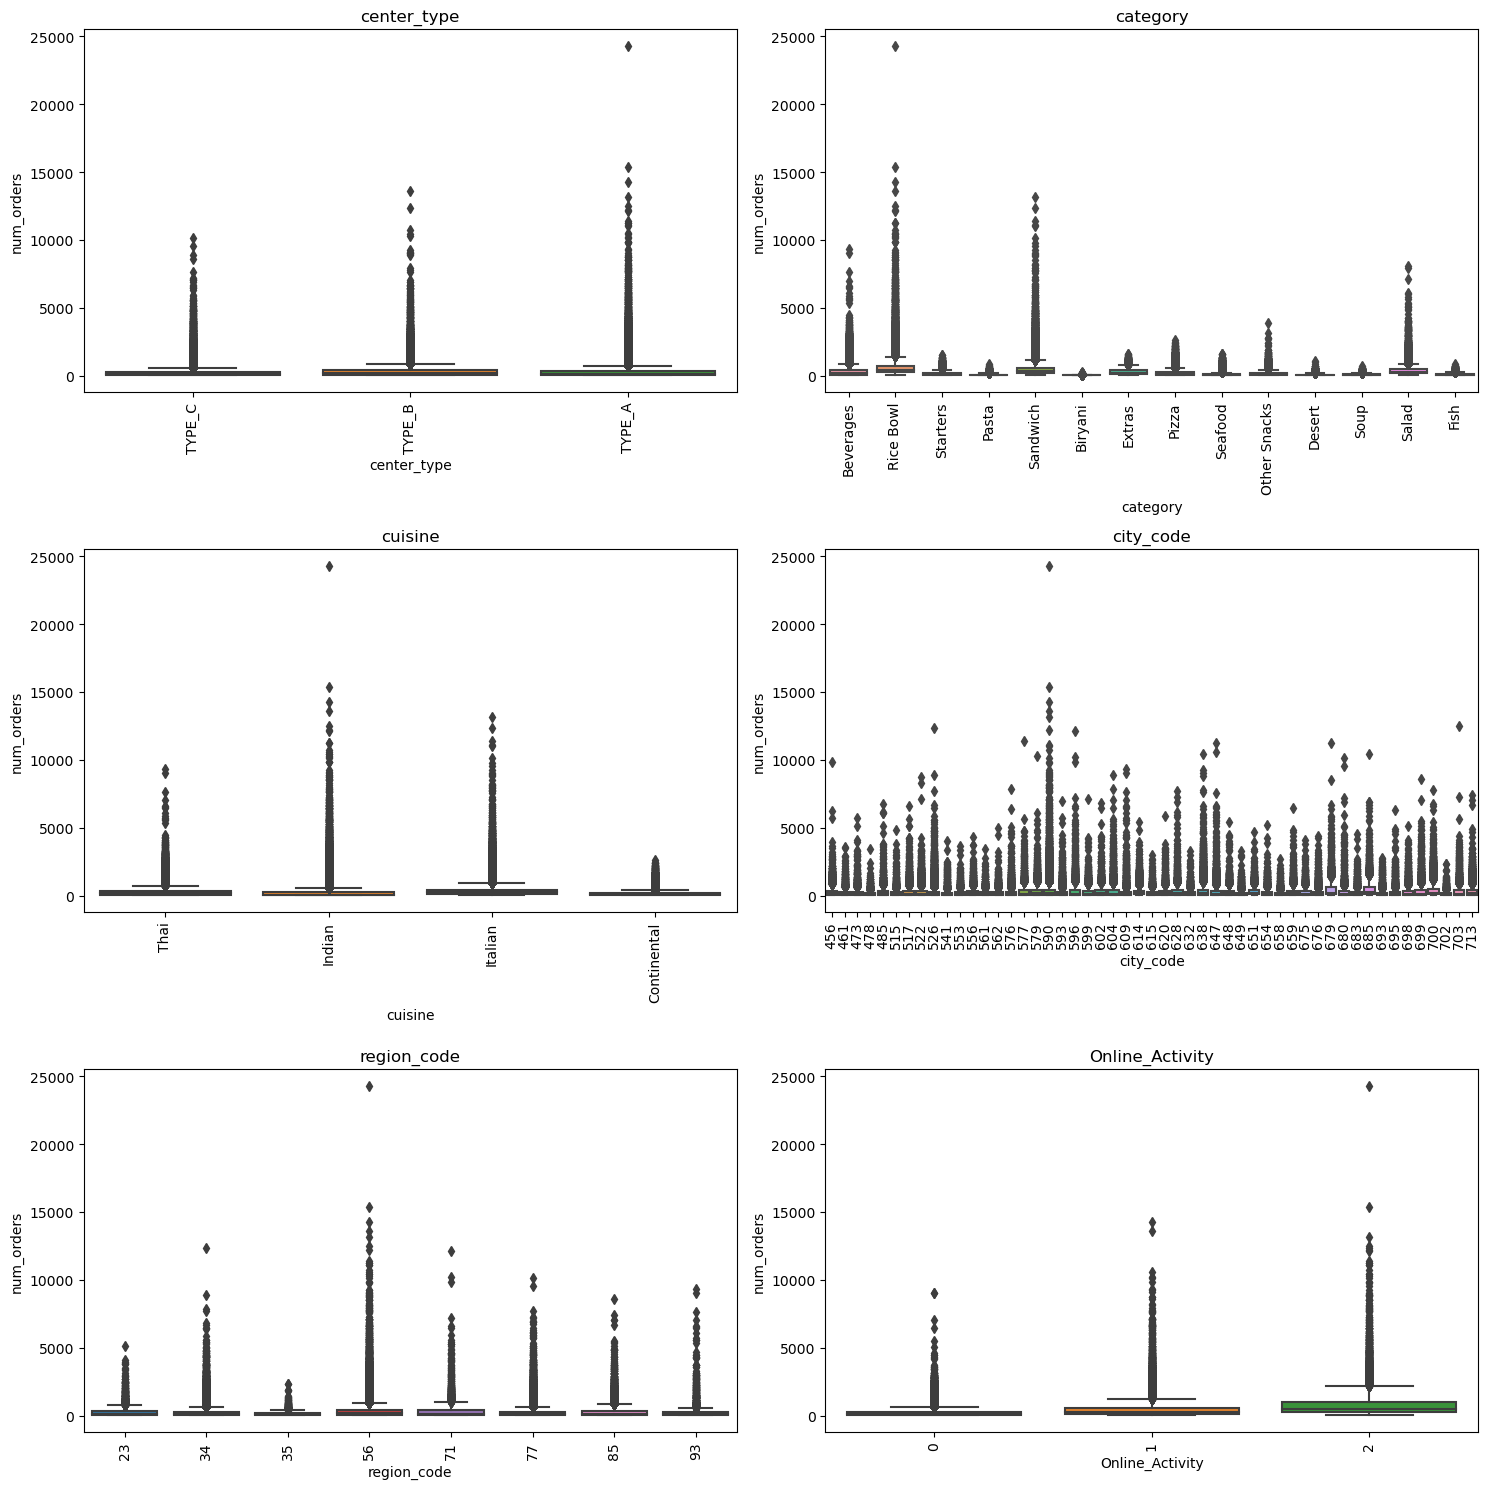

In [20]:
nrows=3
ncols=2
rep=1
plt.figure(figsize=(15,15))

for i in cat_vars:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combined.loc[:,i],combined.num_orders)
    plt.xticks(rotation=90)
    plt.title(i)
    rep+=1
    
plt.tight_layout()
plt.show()

In [21]:
#Count of orders basis center ID:

combined.groupby('center_id')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
center_id,,,,,,,,
10,7015.0,481.969779,553.419756,13.0,134.0,296.0,663.00,13580.0
11,6801.0,411.307161,548.072258,13.0,80.0,204.0,609.00,11260.0
13,7046.0,609.784984,731.416171,13.0,148.0,337.0,810.75,10745.0
14,6041.0,197.832809,261.084555,13.0,41.0,108.0,271.00,5170.0
17,6333.0,192.376283,222.382752,13.0,42.0,121.0,270.00,3604.0
...,...,...,...,...,...,...,...,...
161,5591.0,145.581828,172.940572,13.0,41.0,95.0,188.00,2726.0
162,4366.0,155.807375,223.785532,13.0,40.0,95.0,188.00,4009.0
174,6891.0,405.251342,567.552153,13.0,82.0,189.0,499.00,7749.0


In [22]:
combined['centre_wise_meal_count']=combined.groupby('center_id')['num_orders'].transform('count')
combined['centre_wise_meal_avg']=combined.groupby('center_id')['num_orders'].transform('mean')
combined['centre_wise_meal_std']=combined.groupby('center_id')['num_orders'].transform('std')
combined['centre_wise_meal_median']=combined.groupby('center_id')['num_orders'].transform('median')
combined['centre_wise_meal_max']=combined.groupby('center_id')['num_orders'].transform('max')

In [23]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,Online_Activity,Discount,centre_wise_meal_count,centre_wise_meal_avg,centre_wise_meal_std,centre_wise_meal_median,centre_wise_meal_max
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,0,15.46,5146,163.475709,221.363317,95.0,3280.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,0,98.03,5146,163.475709,221.363317,95.0,3280.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,0,1.00,5146,163.475709,221.363317,95.0,3280.0


In [24]:
#Count of orders basis meal ID:
combined['meal_wise_meal_count']=combined.groupby('meal_id')['num_orders'].transform('count')
combined['meal_wise_meal_avg']=combined.groupby('meal_id')['num_orders'].transform('mean')
combined['meal_wise_meal_std']=combined.groupby('meal_id')['num_orders'].transform('std')
combined['meal_wise_meal_median']=combined.groupby('meal_id')['num_orders'].transform('median')
combined['meal_wise_meal_max']=combined.groupby('meal_id')['num_orders'].transform('max')

In [25]:
#Week wise Count of orders:
combined.groupby('week')['meal_id'].describe()

,count,mean,std,min,25%,50%,75%,max
week,,,,,,,,
1,2922.0,1977.382957,537.907545,1062.0,1543.0,1962.0,2492.0,2867.0
2,2896.0,1980.309738,540.931856,1062.0,1543.0,1962.0,2494.0,2867.0
3,2899.0,1974.210072,540.994361,1062.0,1543.0,1962.0,2492.0,2867.0
4,2889.0,1980.793354,541.487440,1062.0,1543.0,1962.0,2494.0,2867.0
5,2859.0,1980.389647,544.577090,1062.0,1525.0,1962.0,2494.0,2867.0
...,...,...,...,...,...,...,...,...
151,3224.0,2030.358561,548.448754,1062.0,1558.0,1993.0,2569.0,2956.0
152,3242.0,2027.723936,547.925364,1062.0,1558.0,1993.0,2569.0,2956.0
153,3268.0,2033.444002,547.385702,1062.0,1558.0,1993.0,2569.0,2956.0


In [26]:
combined['week_wise_meal_count']=combined.groupby('week')['meal_id'].transform('count')

In [27]:
combined.groupby('city_code')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
city_code,,,,,,,,
456,6716.0,288.448630,390.073103,13.0,54.0,161.0,365.0,9828.0
461,5763.0,200.965469,235.317055,13.0,54.0,136.0,271.0,3590.0
473,5855.0,207.511870,285.284336,13.0,53.0,134.0,271.0,5697.0
478,5021.0,126.972117,153.194944,13.0,40.0,82.0,175.0,3456.0
485,5712.0,254.034664,357.761464,13.0,54.0,163.0,338.0,6777.0
515,5085.0,175.812979,247.225252,13.0,40.0,107.0,231.0,4861.0
517,13109.0,244.531925,315.567725,13.0,54.0,148.0,324.0,6575.0
522,13459.0,250.828813,352.084063,13.0,54.0,134.0,311.0,8762.0
526,43525.0,211.555497,307.633139,13.0,53.0,122.0,270.0,12327.0


In [28]:
#Count of orders basis city code:
combined['city_wise_meal_count']=combined.groupby('city_code')['num_orders'].transform('count')
combined['city_wise_meal_avg']=combined.groupby('city_code')['num_orders'].transform('mean')
combined['city_wise_meal_std']=combined.groupby('city_code')['num_orders'].transform('std')
combined['city_wise_meal_median']=combined.groupby('city_code')['num_orders'].transform('median')
combined['city_wise_meal_max']=combined.groupby('city_code')['num_orders'].transform('max')

In [29]:
combined.groupby('region_code')['num_orders'].describe()

,count,mean,std,min,25%,50%,75%,max
region_code,,,,,,,,
23,6434.0,250.218527,355.900672,13.0,42.0,109.0,325.0,5143.0
34,116713.0,206.075870,280.469659,13.0,53.0,123.0,270.0,12327.0
35,5264.0,131.277356,147.165513,13.0,40.0,94.0,188.0,2349.0
56,191228.0,316.481849,477.083280,13.0,55.0,161.0,404.0,24299.0
71,6293.0,334.225648,563.061248,13.0,53.0,123.0,432.0,12137.0
77,94612.0,216.987835,301.863129,13.0,53.0,134.0,284.0,10124.0
85,30283.0,286.807318,395.241494,13.0,55.0,149.0,366.0,8612.0
93,5721.0,238.820136,479.509199,13.0,53.0,122.0,258.0,9303.0


In [30]:
#Count of orders basis region code:
combined['region_wise_meal_count']=combined.groupby('region_code')['num_orders'].transform('count')
combined['region_wise_meal_avg']=combined.groupby('region_code')['num_orders'].transform('mean')
combined['region_wise_meal_std']=combined.groupby('region_code')['num_orders'].transform('std')
combined['region_wise_meal_median']=combined.groupby('region_code')['num_orders'].transform('median')
combined['region_wise_meal_max']=combined.groupby('region_code')['num_orders'].transform('max')

In [31]:
combined.groupby('op_area')['num_orders'].describe().head()

,count,mean,std,min,25%,50%,75%,max
op_area,,,,,,,,
0.9,3432.0,123.881119,150.533573,13.0,28.0,80.0,161.0,1741.0
1.9,4083.0,121.807005,185.332035,13.0,40.0,81.0,148.0,2823.0
2.0,9512.0,159.955950,222.499488,13.0,28.0,95.0,215.0,4009.0
2.4,5021.0,126.972117,153.194944,13.0,40.0,82.0,175.0,3456.0
2.7,12430.0,246.027353,347.856601,13.0,42.0,123.0,339.0,11380.0


In [32]:
#op_area wise count of orders:
combined['op_area_order_count']=combined.groupby('op_area')['num_orders'].transform('count')
combined['op_area_order_avg']=combined.groupby('op_area')['num_orders'].transform('mean')
combined['op_area_order_std']=combined.groupby('op_area')['num_orders'].transform('std')
combined['op_area_order_median']=combined.groupby('op_area')['num_orders'].transform('median')
combined['op_area_order_max']=combined.groupby('op_area')['num_orders'].transform('max')

In [33]:
### op_area wise count of meal_id
combined['op_area_meal_count']=combined.groupby('op_area')['meal_id'].transform('count')

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [35]:
subset=combined.loc[:,['op_area','base_price','checkout_price']]

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
robust=RobustScaler()
subset_scaled=pd.DataFrame(robust.fit_transform(subset),columns=subset.columns)

In [38]:
"""
#Clustering on op_area & generate cluster labels:
#op_area, num_orders, base_price, checkout_price
n_clus=range(2,12)
sil_score=[]
wcss=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    model.fit(subset_scaled.dropna())
    pred=model.predict(subset_scaled.dropna())
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(subset_scaled.dropna(),pred))
    
sil_score
"""

'\n#Clustering on op_area & generate cluster labels:\n#op_area, num_orders, base_price, checkout_price\nn_clus=range(2,12)\nsil_score=[]\nwcss=[]\nfor i in n_clus:\n    model=KMeans(n_clusters=i)\n    model.fit(subset_scaled.dropna())\n    pred=model.predict(subset_scaled.dropna())\n    wcss.append(model.inertia_)\n    sil_score.append(silhouette_score(subset_scaled.dropna(),pred))\n    \nsil_score\n'

In [39]:
#Clustering on op_area & generate cluster labels:
#op_area, num_orders, base_price, checkout_price
kmeans=KMeans(random_state=42)

elbow=KElbowVisualizer(estimator=kmeans)

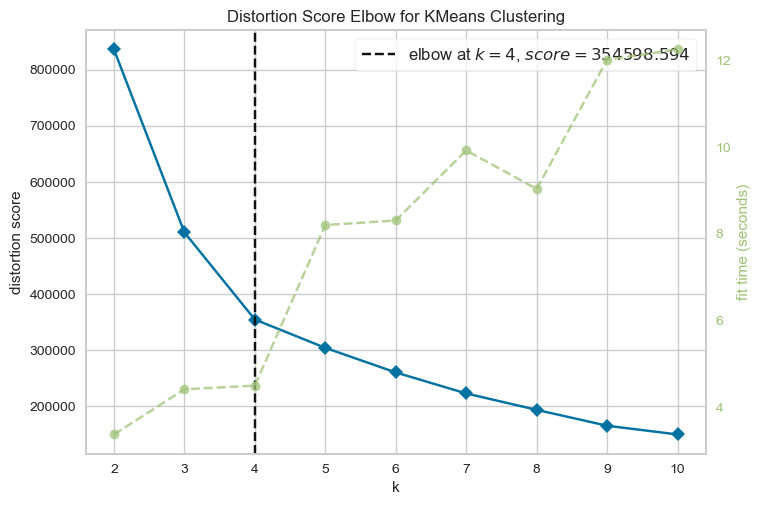

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
elbow.fit(subset_scaled.dropna())
elbow.show()

In [41]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit_transform(subset_scaled)

array([[2.47797372, 1.18270485, 5.28012466, 3.4411459 ],
       [2.49428202, 1.22918401, 5.29393466, 3.48380442],
       [2.49603988, 1.23409173, 5.2954308 , 3.48839881],
       ...,
       [0.6186666 , 2.10813726, 2.34987632, 1.5414493 ],
       [0.6186666 , 2.10813726, 2.34987632, 1.5414493 ],
       [0.43598155, 2.10179236, 2.38320432, 1.82705242]])

In [42]:
combined['cluster_labels']=kmeans.labels_

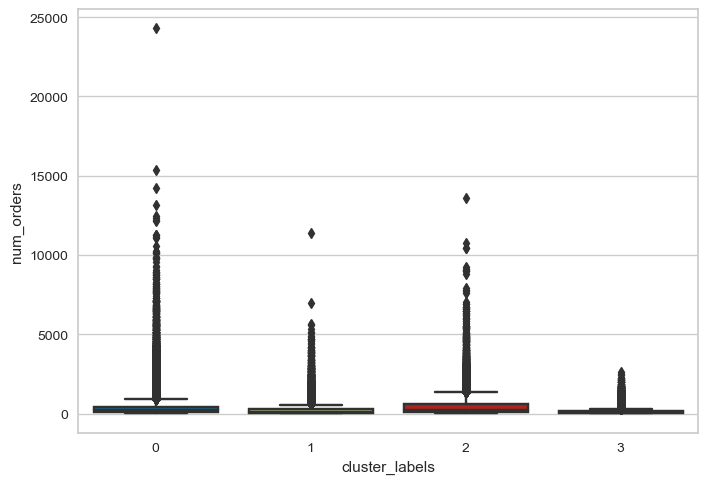

In [43]:
sns.boxplot(combined.cluster_labels,combined.num_orders)
plt.show()

In [44]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,Online_Activity,Discount,centre_wise_meal_count,centre_wise_meal_avg,centre_wise_meal_std,centre_wise_meal_median,centre_wise_meal_max,meal_wise_meal_count,meal_wise_meal_avg,meal_wise_meal_std,meal_wise_meal_median,meal_wise_meal_max,week_wise_meal_count,city_wise_meal_count,city_wise_meal_avg,city_wise_meal_std,city_wise_meal_median,city_wise_meal_max,region_wise_meal_count,region_wise_meal_avg,region_wise_meal_std,region_wise_meal_median,region_wise_meal_max,op_area_order_count,op_area_order_avg,op_area_order_std,op_area_order_median,op_area_order_max,op_area_meal_count,cluster_labels
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,0,15.46,5146,163.475709,221.363317,95.0,3280.0,11092,752.456365,631.487648,567.0,9303.0,2922,11833,276.243387,449.373759,123.0,11246.0,191228,316.481849,477.08328,161.0,24299.0,9512,159.95595,222.499488,95.0,4009.0,10184,1
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0,11116,598.853544,457.266268,473.0,5899.0,2922,11833,276.243387,449.373759,123.0,11246.0,191228,316.481849,477.08328,161.0,24299.0,9512,159.95595,222.499488,95.0,4009.0,10184,1
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,0,1.00,5146,163.475709,221.363317,95.0,3280.0,10451,309.494594,271.655936,230.0,4077.0,2922,11833,276.243387,449.373759,123.0,11246.0,191228,316.481849,477.08328,161.0,24299.0,9512,159.95595,222.499488,95.0,4009.0,10184,1
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,0,98.03,5146,163.475709,221.363317,95.0,3280.0,8899,42.813462,32.591487,28.0,325.0,2922,11833,276.243387,449.373759,123.0,11246.0,191228,316.481849,477.08328,161.0,24299.0,9512,159.95595,222.499488,95.0,4009.0,10184,1
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,0,1.00,5146,163.475709,221.363317,95.0,3280.0,10458,104.239051,99.314171,80.5,1945.0,2922,11833,276.243387,449.373759,123.0,11246.0,191228,316.481849,477.08328,161.0,24299.0,9512,159.95595,222.499488,95.0,4009.0,10184,1


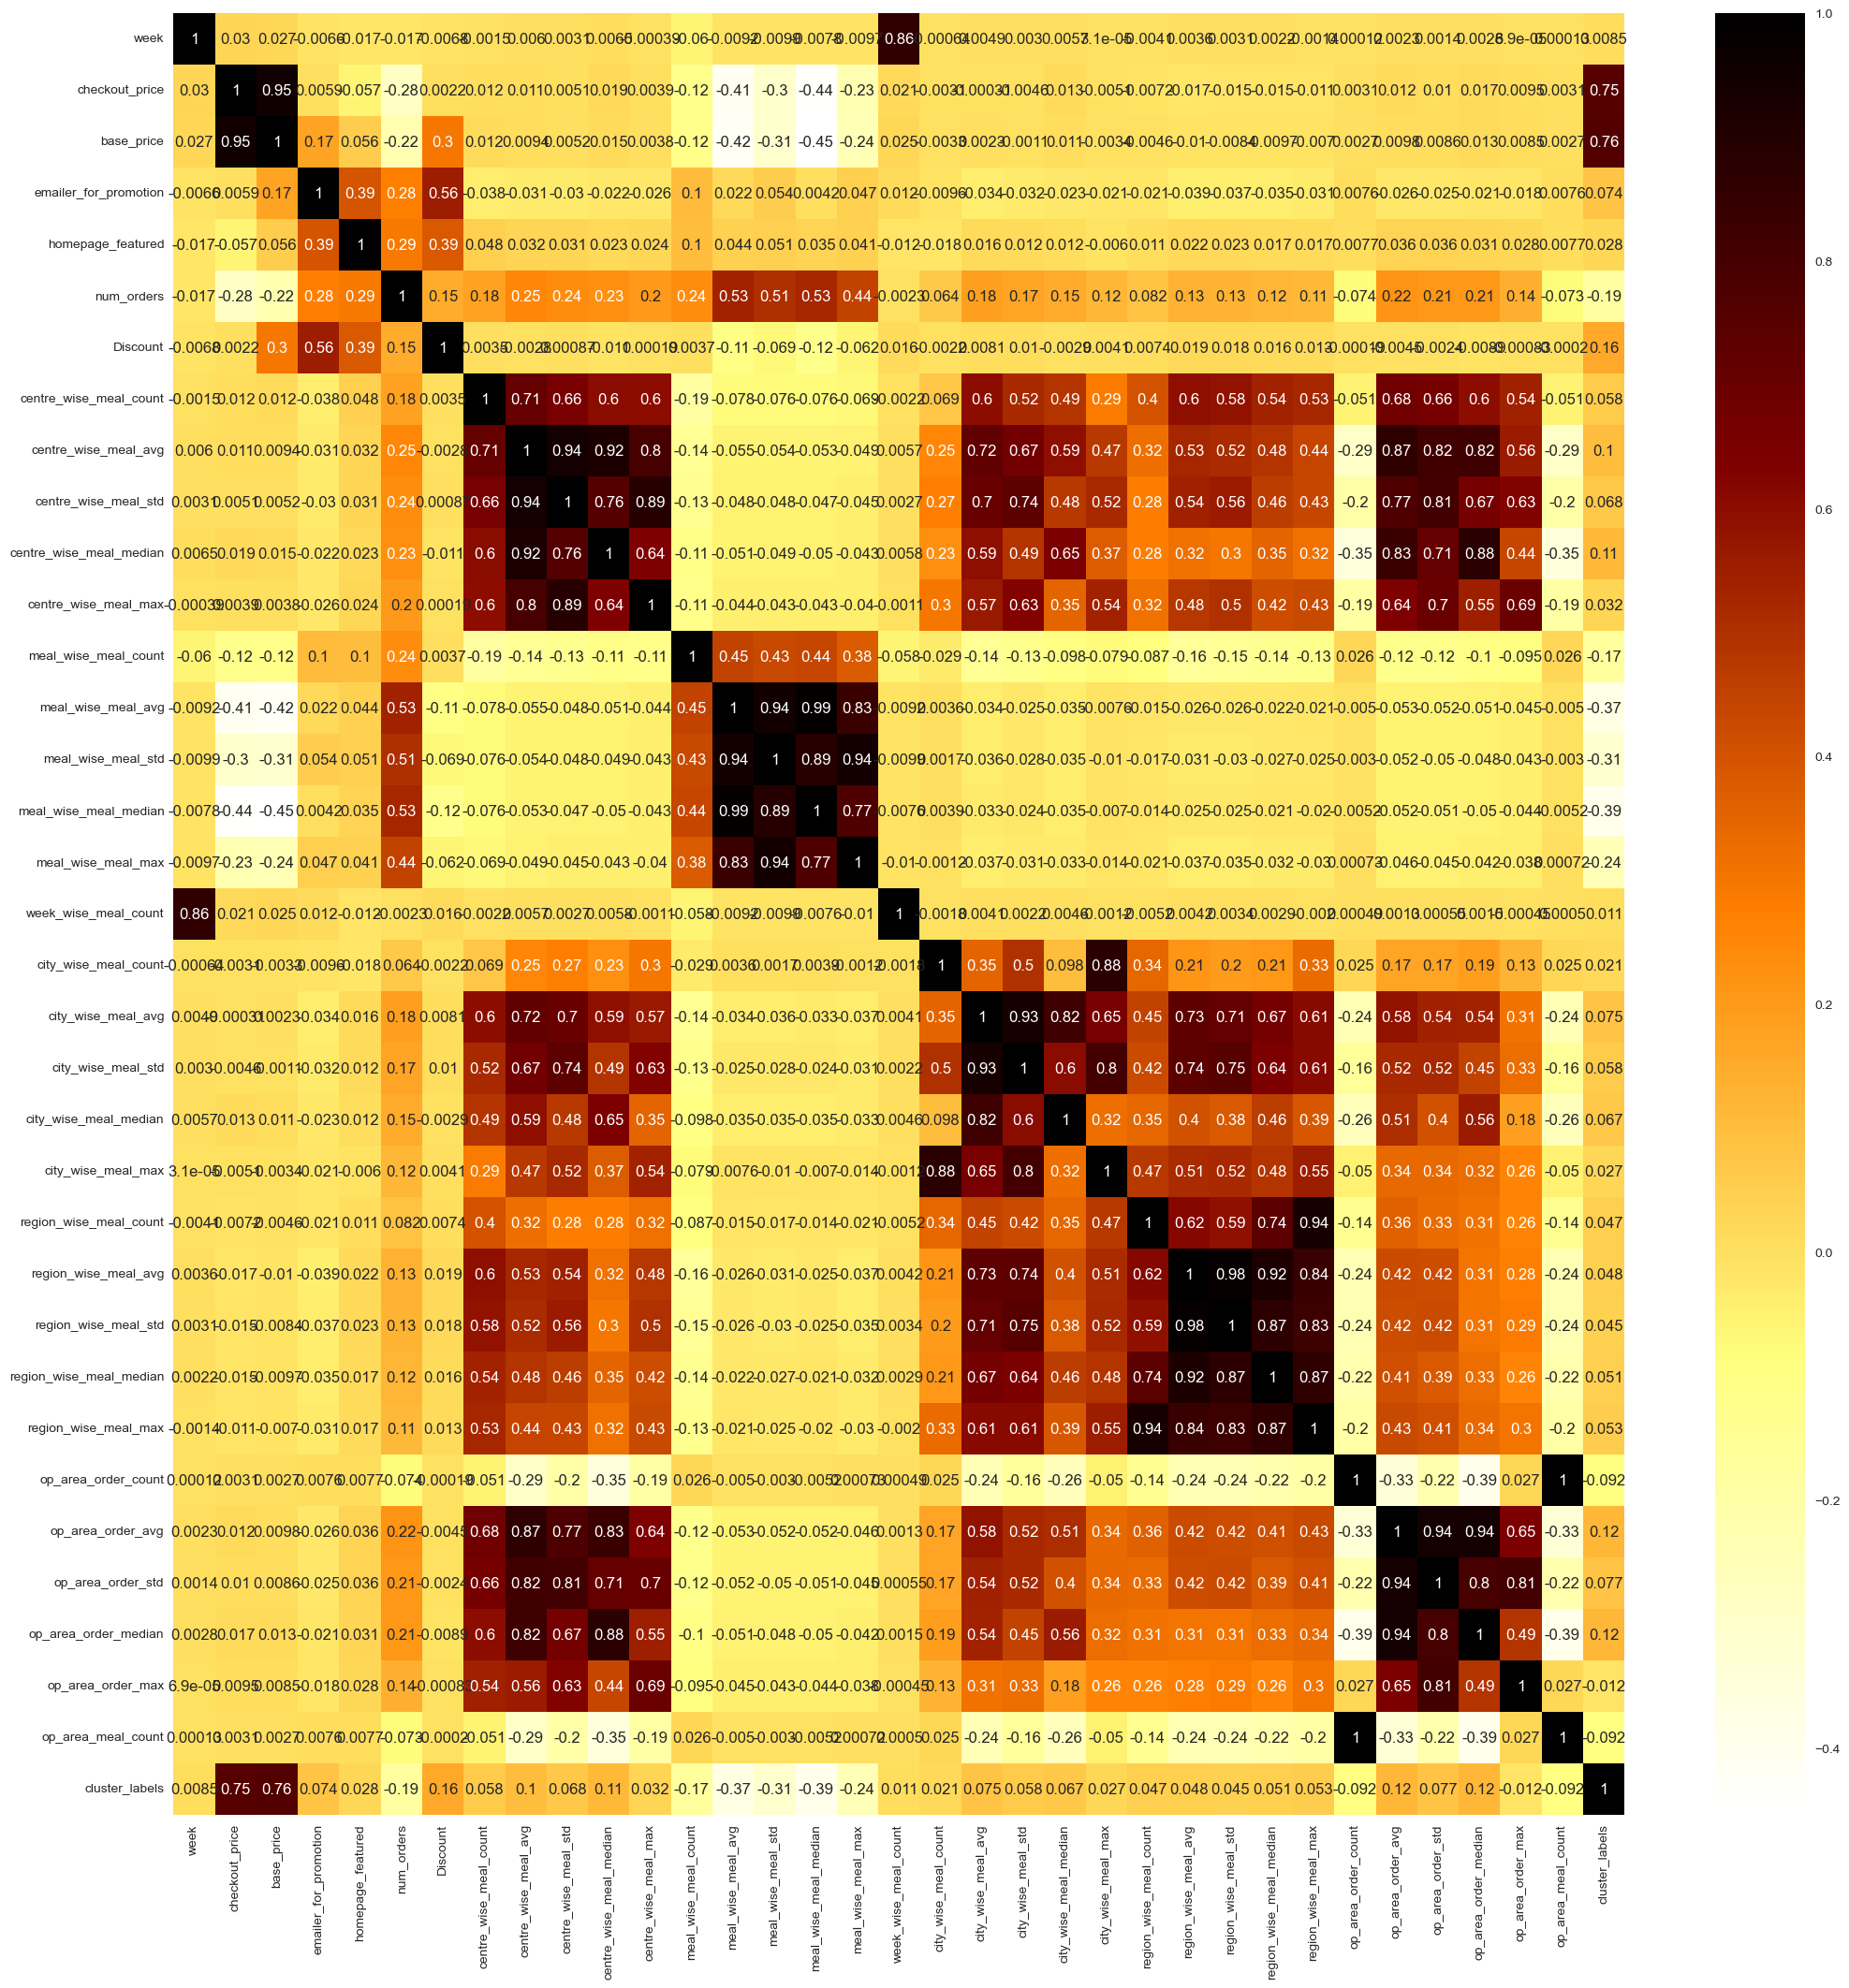

In [45]:
#Heatmap correlation:

plt.figure(figsize=(25,25))
sns.heatmap(combined.drop(['id','center_id','meal_id','Online_Activity','city_code','region_code','op_area'],axis=1).select_dtypes(include='number').corr(),
           annot=True,cmap='afmhot_r')
plt.show()

In [46]:
combined['city_wise_metrics']=combined.loc[:,['city_wise_meal_avg','city_wise_meal_median','city_wise_meal_max']].median(axis=1)

In [47]:
#Outlier Removal
#Checking Correlation Post Outliers
#Creating summary metrics variable basis the variables created - OPTIONAL

In [48]:
newcomb=combined.copy()

In [49]:
#Split data in train & test:
newtrain=newcomb.loc[0:train.shape[0]-1,:]
newtest=newcomb.loc[train.shape[0]:,:]

q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
IQR=q3-q1

upper=q3+1.5*IQR
lower=q1-1.5*IQR

wt_outliers=newtrain[~((newtrain<lower)|(newtrain>upper)).any(axis=1)]

In [50]:
wt_outliers.shape, newtrain.shape

((179715, 46), (456548, 46))

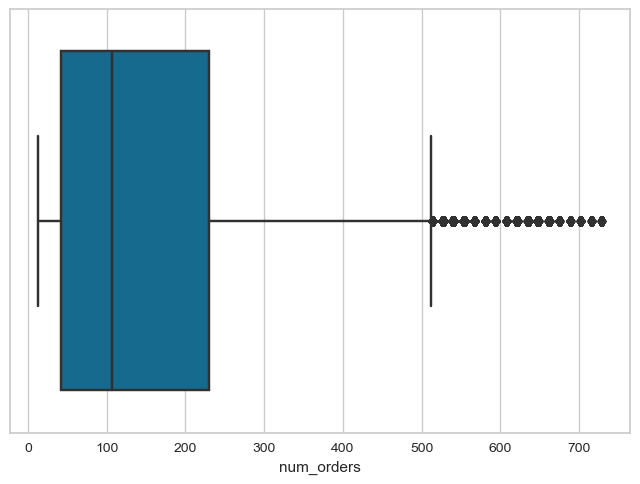

In [51]:
sns.boxplot(wt_outliers.num_orders)
plt.show()

### Winsorization:

In [ ]:
from scipy.stats.mstats import winsorize

for i in combined.columns:
    winsorized=winsorize(combined.loc[:,i],limits=(0.1,0.1))
    combined[i+'_win']=winsorized

In [ ]:
#num_orders after winsorization:
sns.boxplot(combined.num_orders_win)

In [79]:
manual_win=newcomb.loc[0:train.shape[0]-1,:]
newtest=newcomb.loc[train.shape[0]:,:]

manual_win=newcomb[newcomb.num_orders<=24000]

In [80]:
cols = ['checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'cluster_labels', 'Discount',
       'centre_wise_meal_count', 'centre_wise_meal_avg',
       'centre_wise_meal_std', 'centre_wise_meal_median',
       'centre_wise_meal_max', 'meal_wise_meal_count', 'meal_wise_meal_avg',
       'meal_wise_meal_std', 'meal_wise_meal_median', 'meal_wise_meal_max',
       'week_wise_meal_count', 'city_wise_meal_count', 'city_wise_meal_avg',
       'city_wise_meal_std', 'city_wise_meal_median', 'city_wise_meal_max',
       'region_wise_meal_count', 'op_area_order_count', 'op_area_order_avg',
       'op_area_order_std', 'op_area_order_median', 'op_area_order_max',
       'op_area_meal_count', 'city_wise_metrics']

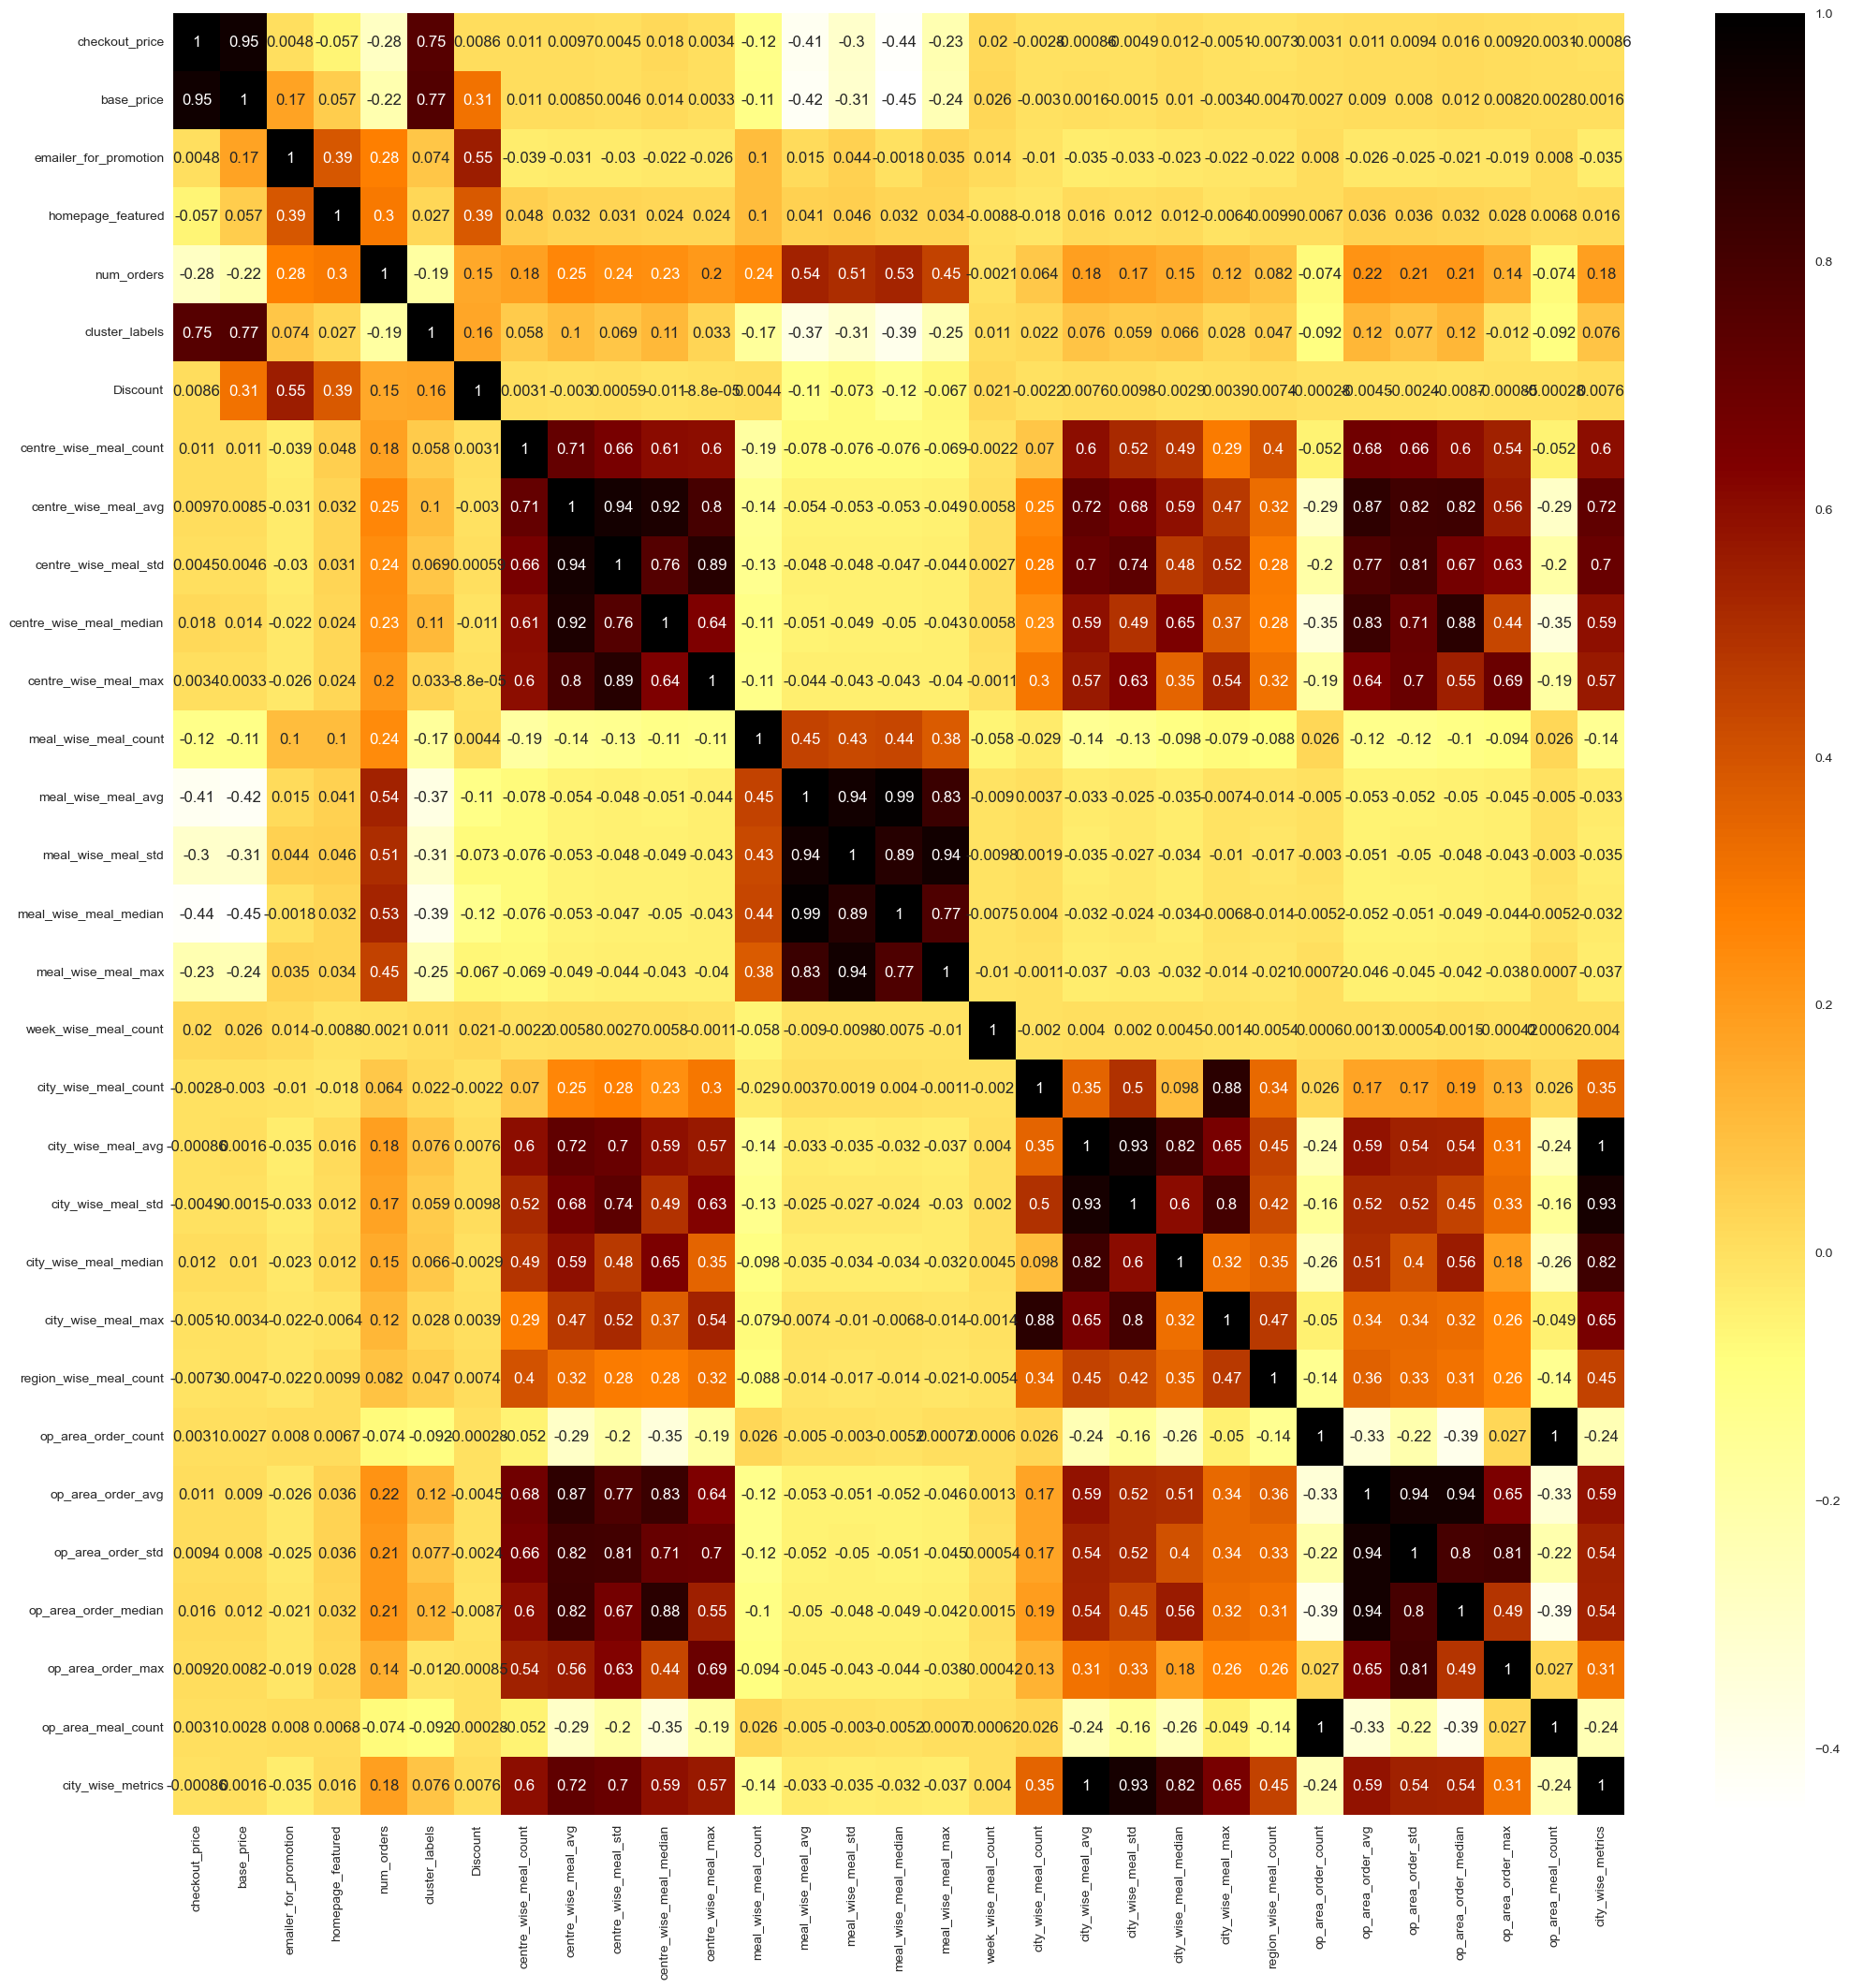

In [81]:
plt.figure(figsize=(25,25))
sns.heatmap(manual_win.loc[:,cols].corr(),annot=True,cmap='afmhot_r')
plt.show()

In [82]:
#eliminate week_wise_meal_count, op_area_meal_count, city_wise_meal_count
#region_wise_meal_count
#Summary metric of op_area_order_avg,median, max ~ median

manual_win.drop(["week_wise_meal_count", "op_area_meal_count",
                 "region_wise_meal_count","city_wise_meal_count"],
               axis=1,inplace=True)

In [83]:
newtest.drop(["week_wise_meal_count", "op_area_meal_count",
                 "region_wise_meal_count","city_wise_meal_count"],
               axis=1,inplace=True)

In [84]:
manual_win['op_area_metrics']=manual_win.loc[:,['op_area_order_avg',
                                               'op_area_order_median',
                                               'op_area_order_max']].median(axis=1)

newtest['op_area_metrics']=newtest.loc[:,['op_area_order_avg',
                                               'op_area_order_median',
                                               'op_area_order_max']].median(axis=1)

In [85]:
#Dropping cols for which summary is created:
manual_win.drop(['op_area_order_avg',
                'op_area_order_median',
                'op_area_order_max'],
               axis=1,inplace=True)

newtest.drop(['op_area_order_avg',
                'op_area_order_median',
                'op_area_order_max'],
               axis=1,inplace=True)

In [86]:
manual_win.shape

(456547, 40)

In [87]:
manual_win.drop(["city_wise_meal_avg","city_wise_meal_median","city_wise_meal_max"],
               axis=1,inplace=True)

In [88]:
manual_win.category.unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Soup', 'Salad', 'Fish'], dtype=object)

In [89]:
fast_food=['Pasta', 'Sandwich', 'Extras', 'Pizza', 'Other Snacks']
main_course=['Rice Bowl','Biryani','Seafood','Salad','Fish']

def food(x):
    if x in fast_food:
        return('Fast_Food')
    elif x in main_course:
        return('Main_Course')
    else:
        return('Others')

manual_win['food_cat']=manual_win.category.apply(food)
newtest['food_cat']=newtest.category.apply(food)

<AxesSubplot:xlabel='food_cat', ylabel='num_orders'>

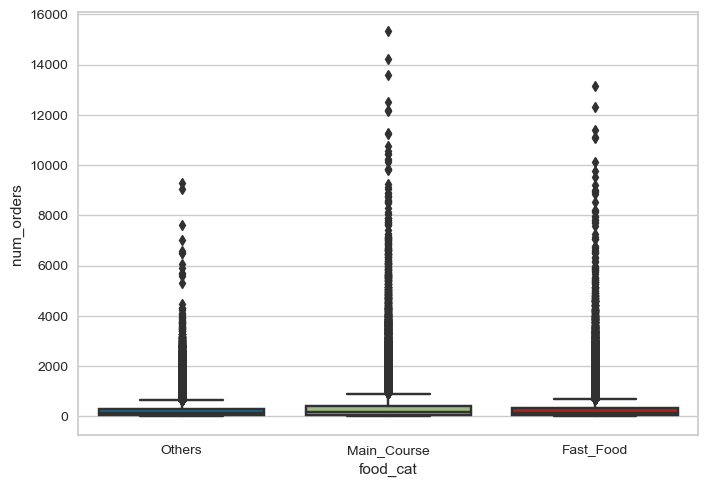

In [90]:
sns.boxplot(manual_win.food_cat,manual_win.num_orders)

In [96]:
manual_win.shape

(456547, 38)

In [92]:
columns_total=['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders',
       'cluster_labels', 'city_code', 'region_code', 'center_type', 'op_area',
       'category', 'cuisine', 'Online_Activity', 'Discount',
       'centre_wise_meal_count', 'centre_wise_meal_avg',
       'centre_wise_meal_std', 'centre_wise_meal_median',
       'centre_wise_meal_max', 'meal_wise_meal_count', 'meal_wise_meal_avg',
       'meal_wise_meal_std', 'meal_wise_meal_median', 'meal_wise_meal_max',
       'city_wise_meal_std', 'op_area_order_count', 'op_area_order_std',
       'city_wise_metrics', 'op_area_metrics', 'food_cat']

In [93]:
len(columns_total)

34

In [97]:
newtest.shape

(32573, 41)

In [99]:
manual_win=manual_win.loc[:,columns_total]

In [100]:
newtest=newtest.loc[:,columns_total]

In [101]:
manual_win.drop(['id','week','center_id','meal_id','city_code',
                 'region_code','op_area','category'],axis=1,inplace=True)

newtest.drop(['id','week','center_id','meal_id','city_code',
                 'region_code','op_area','category'],axis=1,inplace=True)

In [102]:
#Lets apply one hot encoding:
dummytrain=pd.get_dummies(manual_win,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [103]:
train.shape, test.shape, newcomb.shape, dummytrain.shape, dummytest.shape

((456548, 9), (32573, 8), (489121, 46), (456547, 30), (32573, 30))

# Modeling:

In [107]:
#X & y:
X=dummytrain.drop('num_orders',axis=1)
y=dummytrain.num_orders

dummytest=dummytest.drop('num_orders',axis=1)

In [108]:
X.shape, dummytest.shape

((456547, 29), (32573, 29))

In [109]:
#Import requiered libraries:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [110]:
scaling_cols = ['checkout_price', 'base_price', 'Discount',
       'centre_wise_meal_count', 'centre_wise_meal_avg',
       'centre_wise_meal_std', 'centre_wise_meal_median',
       'centre_wise_meal_max', 'meal_wise_meal_count', 'meal_wise_meal_avg',
       'meal_wise_meal_std', 'meal_wise_meal_median', 'meal_wise_meal_max',
       'city_wise_meal_std', 'op_area_order_count', 'op_area_order_std',
       'city_wise_metrics', 'op_area_metrics']

In [111]:
robust=RobustScaler()

In [112]:
for i in scaling_cols:
    X.loc[:,i]=robust.fit_transform(pd.DataFrame(X.loc[:,i]))
    dummytest.loc[:,i]=robust.transform(pd.DataFrame(dummytest.loc[:,i]))

In [113]:
#Dictionary of models:

def base_models():
    models={}
    models['lr']=LinearRegression()
    models['tree']=DecisionTreeRegressor()
    models['rf']=RandomForestRegressor()
    models['gbm']=GradientBoostingRegressor()
    models['xgb']=XGBRegressor()
    models['lgbm']=LGBMRegressor()
    return models

In [114]:
#Eval metrics:

def eval_score(model):
    cv=KFold(n_splits=5, shuffle=True,random_state=42)
    score=np.abs(cross_val_score(model, X, y, 
                                 scoring='neg_root_mean_squared_error',
                                 error_score='raise',n_jobs=-1))
    return score

In [115]:
#Lets build the models & Generate the stats:

models=base_models()        #linking base models

result,names=list(),list()

for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print((name, np.mean(result)),np.std(result))

('lr', 283.7326152164354) 25.322325290862157
('tree', 262.65926158845593) 32.44042027798422
('rf', 238.8394875440592) 44.025110859279195
('gbm', 231.29157151900637) 41.15447265462878
('xgb', 221.63329041914741) 42.09746999261459
('lgbm', 215.9969205083181) 40.950031523087816


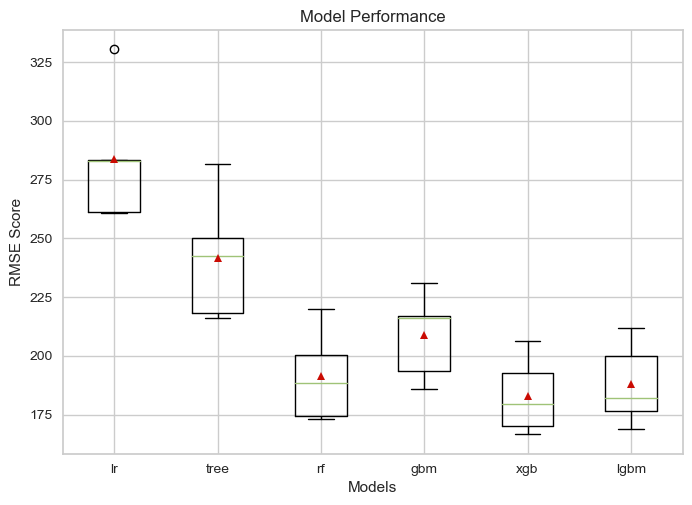

In [116]:
#Code for plotting:

plt.boxplot(result,labels=names,showmeans=True)
plt.xlabel("Models")
plt.ylabel('RMSE Score')
plt.title('Model Performance')
plt.show()

In [119]:
#Lets take XGB & build a model:

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

xgb=XGBRegressor()
pred_xgb=[]

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(dummytest))
    
prediction=pd.DataFrame(pred_xgb).T.mean(axis=1)

In [120]:
submission=pd.read_csv('sample_submission.csv')

In [121]:
submission['num_orders']=np.abs(prediction)

In [122]:
submission.to_csv('XGB_FoodDemand.csv',index=False)

In [128]:
#Lets take XGB & build a model:

kfold=KFold(n_splits=5, shuffle=True, random_state=0)

lgbm=LGBMRegressor()
pred_lgbm=[]

for train_index, test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(dummytest))
    
prediction=pd.DataFrame(pred_lgbm).T.mean(axis=1)

In [129]:
submission['num_orders']=np.abs(prediction)

In [130]:
submission.to_csv('LGBM_FoodDemand.csv',index=False)

### Next Steps:

* Reduce more outliers
* Reduce number of columns that we created basis correlation
* Apply pd.factorize instead of One Hot Encoding
* Try SFS

<AxesSubplot:>

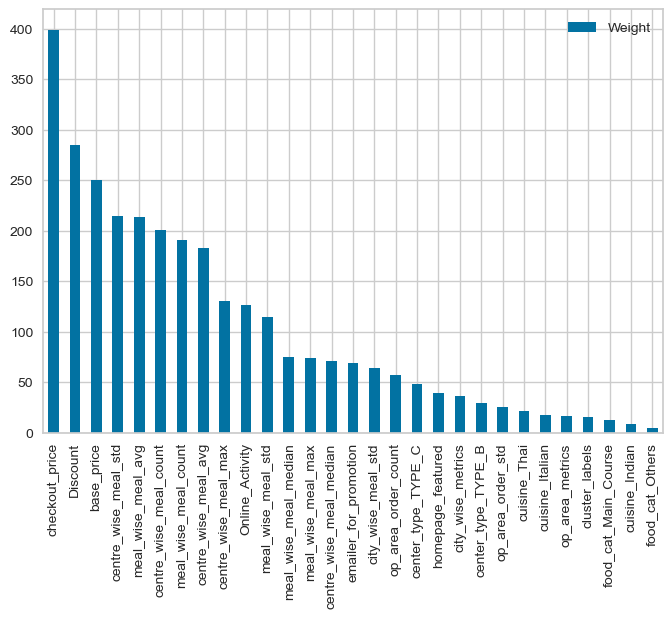

In [131]:
pd.DataFrame(lgbm.feature_importances_, index=lgbm.feature_name_,
            columns=['Weight']).sort_values(by='Weight',ascending=False).plot(kind='bar')

<AxesSubplot:>

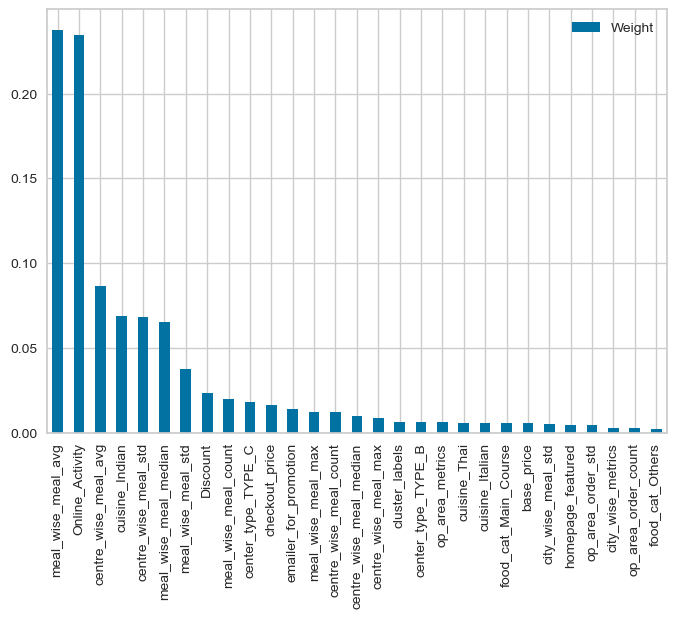

In [132]:
pd.DataFrame(xgb.feature_importances_, index=xgb.feature_names_in_,
            columns=['Weight']).sort_values(by='Weight',ascending=False).plot(kind='bar')